In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset into python environment

In [2]:
data = pd.read_csv("/content/titanic_dataset .csv",index_col="PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. Do all the necessary pre-processing steps

In [8]:
data["Age"].fillna(method="ffill",inplace=True)
data["Cabin"].fillna(method="bfill",inplace=True)
data["Embarked"].fillna(method="ffill",inplace=True)

In [9]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

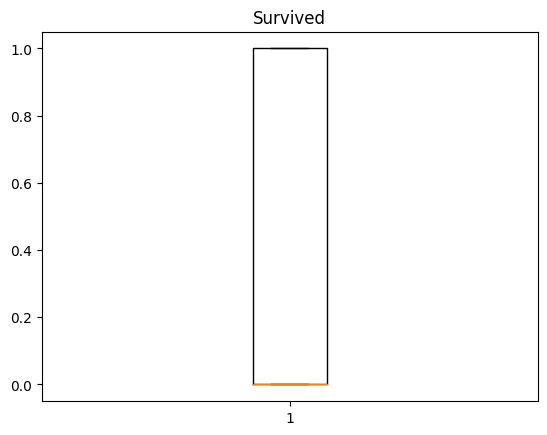

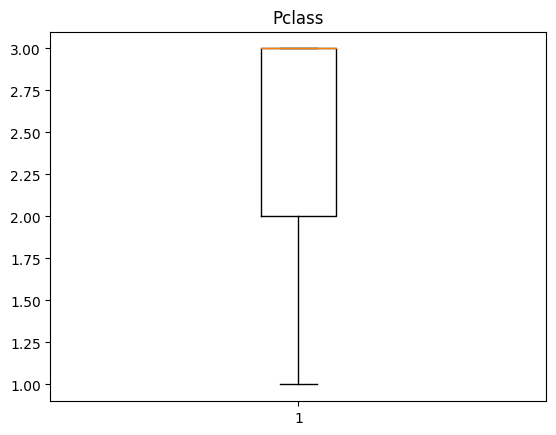

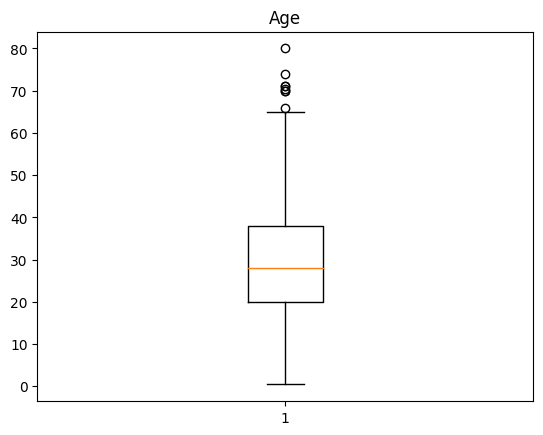

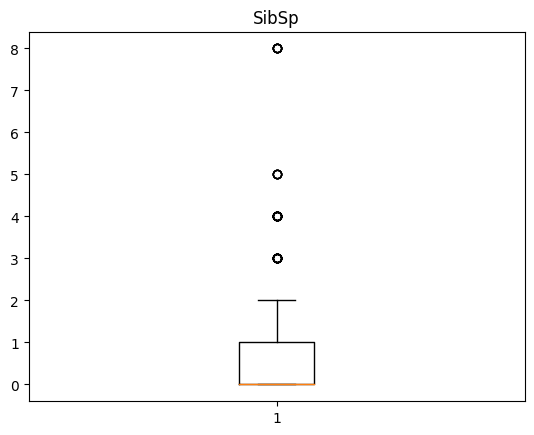

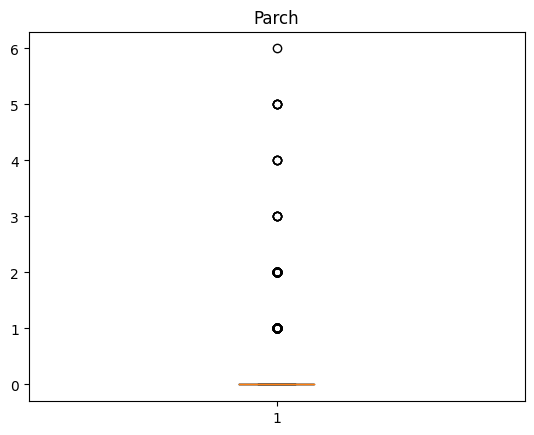

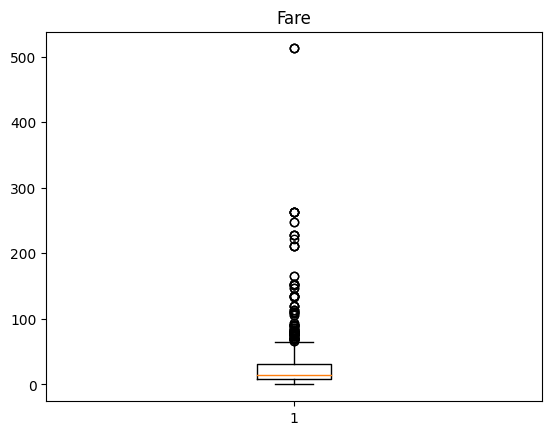

In [10]:
num_col = ["Survived","Pclass","Age","SibSp","Parch","Fare"]
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [11]:
Q1 = np.percentile(data["Parch"],25,method= 'midpoint')
Q2 = np.percentile(data["Parch"],50,method= 'midpoint')
Q3 = np.percentile(data["Parch"],75,method= 'midpoint')

In [12]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 0.0
q2 is 0.0
q3 is 0.0


In [13]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 0.0
max is 0.0


In [14]:
outlier = []
for x in data["Parch"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier



[1,
 2,
 1,
 5,
 1,
 1,
 5,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 4,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 2,
 1,
 5,
 2,
 1,
 1,
 1,
 2,
 1,
 6,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 5,
 2]

In [15]:
ind1 = data["Parch"]>up_lim
data.loc[ind1].index

Int64Index([  8,   9,  11,  14,  17,  25,  26,  28,  44,  51,
            ...
            856, 857, 859, 864, 870, 872, 880, 881, 886, 889],
           dtype='int64', name='PassengerId', length=213)

In [16]:
data.drop(data.loc[ind1].index,inplace= True)

In [17]:
Q1 = np.percentile(data["Fare"],25,method= 'midpoint')
Q2 = np.percentile(data["Fare"],50,method= 'midpoint')
Q3 = np.percentile(data["Fare"],75,method= 'midpoint')

In [18]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 7.8542
q2 is 10.5
q3 is 26.0


In [19]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is -19.364500000000003
max is 53.2187


In [20]:
outlier = []
for x in data["Fare"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier


[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 56.4958,
 61.175,
 73.5,
 79.2,
 66.6,
 56.4958,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 110.8833,
 108.9,
 56.9292,
 83.1583,
 135.6333,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 55.4417,
 135.6333,
 82.1708,
 227.525,
 73.5,
 113.275,
 90.0,
 55.9,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 86.5,
 108.9,
 56.4958,
 59.4,
 93.5,
 221.7792,
 106.425,
 106.425,
 227.525,
 55.9,
 78.2667,
 56.9292,
 153.4625,
 77.9583,
 69.3,
 56.4958,
 76.7292,
 73.5,
 133.65,
 73.5,
 76.7292,
 57.0,
 56.4958,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 86.5,
 77.9583,
 57.0,
 79.2,
 56.4958,
 80.0,
 56.4958,
 89.1042]

In [21]:
ind1 = data["Fare"]>up_lim
data.loc[ind1].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  75,  93, 121, 140, 152, 170,
            196, 216, 219, 225, 231, 246, 257, 258, 259, 270, 276, 291, 292,
            307, 308, 310, 311, 326, 335, 337, 338, 367, 370, 371, 374, 376,
            381, 386, 394, 413, 435, 454, 485, 487, 497, 505, 506, 510, 514,
            521, 528, 538, 545, 558, 578, 592, 600, 610, 628, 642, 644, 646,
            656, 661, 666, 682, 691, 693, 701, 709, 717, 731, 738, 742, 760,
            766, 782, 790, 827, 830, 839, 850],
           dtype='int64', name='PassengerId')

In [22]:
data.drop(data.loc[ind1].index,inplace= True)

In [23]:
Q1 = np.percentile(data["SibSp"],25,method= 'midpoint')
Q2 = np.percentile(data["SibSp"],50,method= 'midpoint')
Q3 = np.percentile(data["SibSp"],75,method= 'midpoint')

In [24]:
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 0.0
q2 is 0.0
q3 is 0.0


In [25]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is",low_lim)
print("max is",up_lim)

min is 0.0
max is 0.0


In [26]:
outlier = []
for x in data["SibSp"]:
 if((x>up_lim)or(x<low_lim)):
  outlier.append(x)
outlier

[1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1]

In [27]:
ind1 = data["SibSp"]>up_lim
data.loc[ind1].index

Int64Index([  1,   4,  10,  19,  36,  39,  40,  41,  42,  47,  49,  50,  54,
             70,  74,  86, 100, 105, 110, 112, 114, 118, 123, 126, 133, 134,
            138, 143, 187, 193, 207, 215, 218, 237, 241, 242, 250, 254, 268,
            302, 309, 317, 331, 334, 348, 354, 362, 365, 372, 384, 393, 403,
            404, 406, 427, 432, 433, 443, 452, 458, 477, 478, 491, 519, 544,
            547, 557, 560, 566, 572, 579, 595, 606, 613, 618, 621, 622, 640,
            665, 670, 672, 705, 713, 722, 725, 727, 729, 730, 744, 749, 769,
            810, 831, 855, 861, 862, 867, 875],
           dtype='int64', name='PassengerId')

In [28]:
data.drop(data.loc[ind1].index,inplace= True)

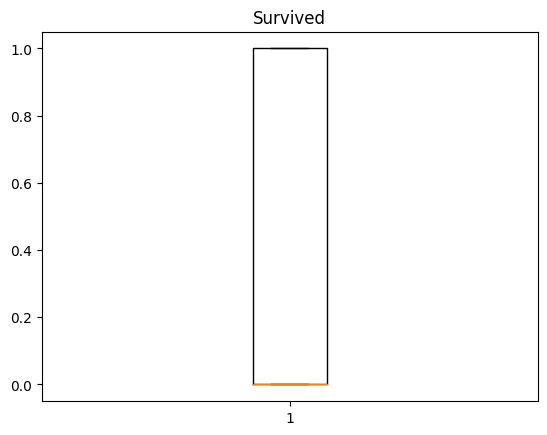

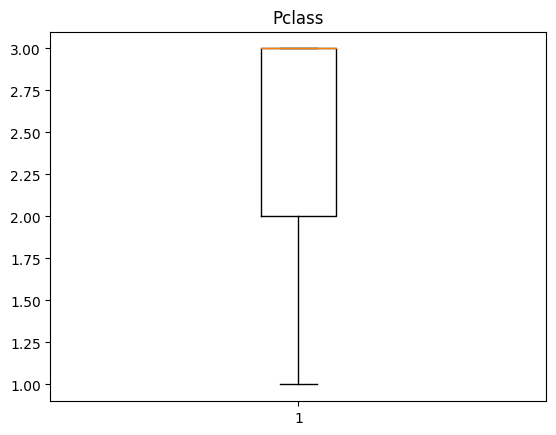

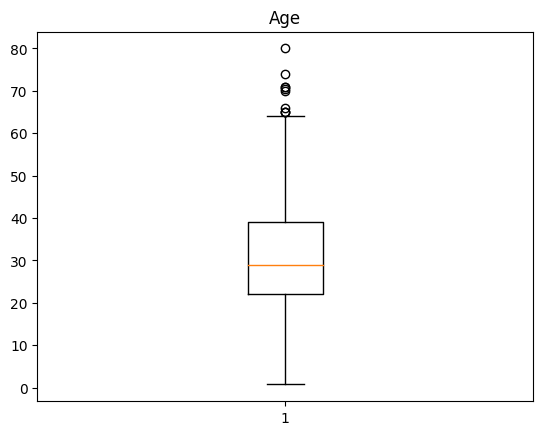

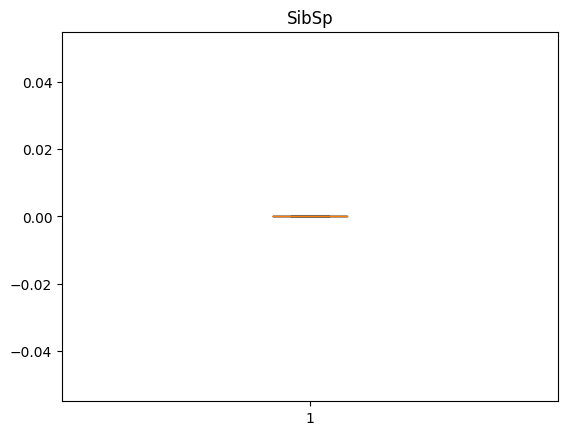

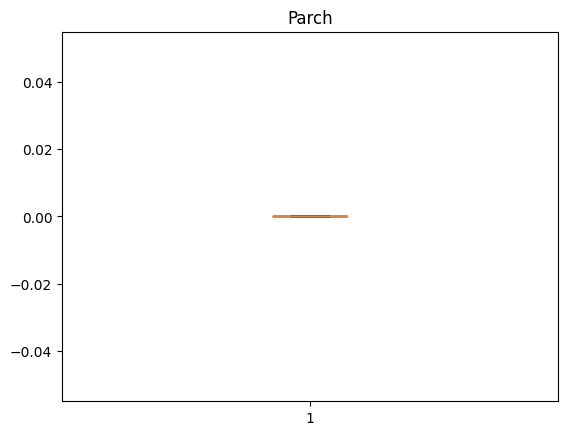

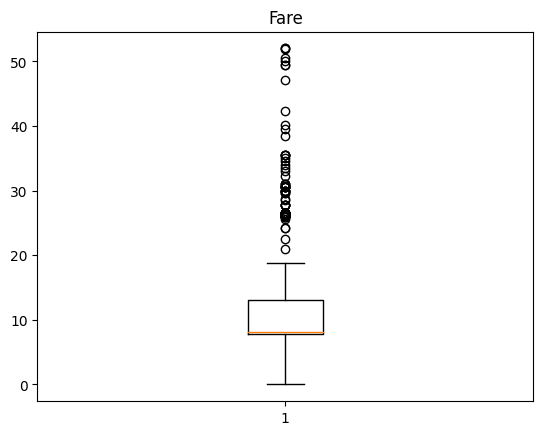

In [29]:
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
data["Name"] = le.fit_transform(data["Name"])
data["Cabin"] = le.fit_transform(data["Cabin"])
data["Ticket"] = le.fit_transform(data["Ticket"])
data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

In [33]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
3,1,3,173,0,26.0,0,0,469,7.9250,69,2
5,0,3,8,1,35.0,0,0,335,8.0500,48,2
6,0,3,295,1,35.0,0,0,176,8.4583,48,1
7,0,1,269,1,54.0,0,0,51,51.8625,114,2
12,1,1,42,0,58.0,0,0,26,26.5500,42,2
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,440,1,25.0,0,0,453,7.0500,61,2
887,0,2,293,1,27.0,0,0,59,13.0000,61,2
888,1,1,150,0,19.0,0,0,10,30.0000,26,2


In [34]:
x = data.drop(["Survived"],axis=1)
y = data["Survived"]

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.svm import SVC
svm_cls =SVC(kernel ='linear')
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred_svm)

array([[71,  3],
       [ 9, 16]])

In [38]:
accuracy_score(y_test,y_pred_svm)

0.8787878787878788

### 3. Create kNN and SVM models

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
metric_k = []
neighbors = np.arange(3,15)

In [41]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

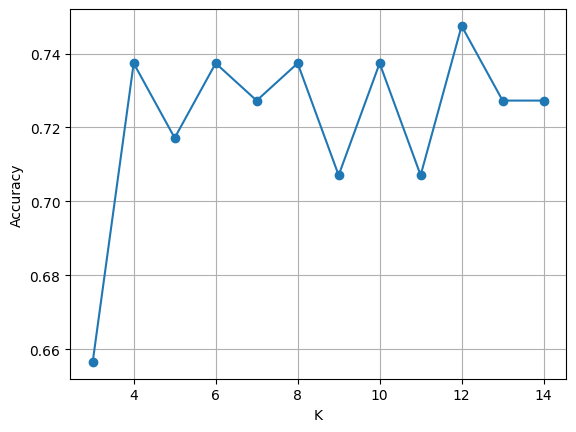

In [42]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [43]:
classifier = KNeighborsClassifier(n_neighbors = 12, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [44]:
confusion_matrix(y_test,y_pred)

array([[72,  2],
       [23,  2]])

In [45]:
print('Accuracy =',accuracy_score(y_test,y_pred))

Accuracy = 0.7474747474747475


### 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [46]:
from sklearn.model_selection import KFold

In [47]:
k = KFold(10)

In [48]:
for train_index,test_index in k.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cv_result_knn = cross_val_score(classifier,x,y,cv=k)
cv_result_knn

array([0.6       , 0.78      , 0.72      , 0.7       , 0.64      ,
       0.79591837, 0.71428571, 0.81632653, 0.71428571, 0.7755102 ])

In [51]:
np.mean(cv_result_knn)

0.7256326530612245

In [52]:
cv_result_svm = cross_val_score(svm_cls,x,y,cv=k)
cv_result_svm

array([0.86      , 0.86      , 0.76      , 0.88      , 0.74      ,
       0.79591837, 0.81632653, 0.87755102, 0.87755102, 0.83673469])

In [54]:
np.mean(cv_result_svm)

0.8304081632653062

In [55]:
from sklearn.model_selection import StratifiedKFold

sk = StratifiedKFold(n_splits = 10)

In [56]:
for train_index,test_index in sk.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 27  28  32  38  40  41  43  55  56  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292

In [58]:
skvc_result_knn = cross_val_score(classifier,x,y,cv = sk)

In [59]:
skvc_result_knn

array([0.7       , 0.72      , 0.74      , 0.76      , 0.66      ,
       0.73469388, 0.71428571, 0.75510204, 0.69387755, 0.71428571])

In [60]:
np.mean(skvc_result_knn)

0.7192244897959184

In [61]:
skvc_result_svm = cross_val_score(svm_cls,x,y,cv = sk)

In [62]:
skvc_result_svm

array([0.88      , 0.84      , 0.82      , 0.8       , 0.9       ,
       0.73469388, 0.81632653, 0.83673469, 0.83673469, 0.83673469])

In [63]:
np.mean(skvc_result_svm)

0.8301224489795919